# Exploratory Data Analysis of IPL Data Set 

## Table of Contents

1. [Problem Statement](#section1)<br/>
2. [Data Loading and Description](#section2)
3. [Importing necessary Packages and Dataset](#section3)
3. [Data Profiling](#section4)
    - 4.1 [Understanding the Dataset](#section41)<br/>
    - 4.2 [Pre Profiling](#section42)<br/>
    - 4.3 [Pre Processing](#section43)<br/>
    - 4.4 [Post Profiling](#section44)<br/>
5. [Dividing the dataset into dependent and independent variable](#section5)    
6. [Dividing the dataset into training, testing and checking the shape](#section6)
7. [Applying Classification Models with default parameters](#section7)
    - 7.01 [Logistic Regression](#section701)
    - 7.02 [Decision Tree](#section702)<br/>
    - 7.03 [Random Forest](#section703)<br/>
8. [Applying Classification Models with grid search](#section8)
    - 8.01 [Decision Tree](#section801)<br/>
    - 8.02 [Random Forest](#section802)<br/>  
9. [Model Evaluation using confusion Matrix, Precision, recall](#section9)    
10. [Conclusion](#section10)


### 1. Problem Statement <a class="anchor" id="section1"></a>

We are building a __Predictive Machine Learning Model__ to predict the risk factor for a firm while giving life insurance to the new and existing customers based upon their medical history, family history and various other factors.

* __Predictive Machine Learning Model__ <br/>
Predictive Modeling will identify the accuracy of risk on a level(1-8), 8 being the highest. 

### 2. Data Loading and description <a class="anchor" id="section2"></a>
<img src="https://images.financialexpress.com/2018/07/illustration-of-life-insurance_53876-5308-1.jpg">


- The data set consists of information about __Insurance Data__ of a firm for existing and new customers. Various variables present in the dataset includes data of medical history,family history,product info(applied for insurance) etc.
- The data set consist of __59381 observtions from 128 columns__. Below is table showing names of all columns and their description: 

| Column Name | Description |
| --- | --- |
| `Id` | Unique Customer Id |
| `ProductInfo_1-7` | A set of normalized variables relating to the product applied for |
| `Ins_Age`| Normalized age of applicant|
| `Ht` | Normalized height of applicant |
| `Wt` | Normalized weight of applicant |
| `BMI` | Normalized BMI of applicant |
| `Employment_Info_1-6` | A set of normalized variables relating to the employment history of the<br> applicant |
| `InsuredInfo_1-7` | A set of normalized variables providing information about the applicant |
| `Insurance_History_1-9` | A set of normalized variables relating to the insurance history of the<br> applicant |
| `Family_Hist_1-5` | A set of normalized variables relating to the family history of the applicant |
| `Medical_History_1-41` | A set of normalized variables relating to the medical history of the applicant |
| `Medical_Keyword_1-48` | A set of dummy variables relating to the presence of/absence of a medical<br> keyword being associated with the application |
| `Response` | This is the target variable, an ordinal variable relating to the final decision <br>associated with an application |

### Some Useful Insights 

__Insurance__ is a means of protection from financial loss.It can cover your loss caused either by accident or other unpredicted factors. Insurance firms gathers data from customers and on the basis of provided data they provide insurance. Insurance is one of the essentials which an individual should have for the more contented future of his family in his absence.

### 3. Importing necessary Packages and dataset <a class="anchor" id="section3"></a>

#### Importing packages

In [198]:
import numpy as np                                                 # Implemennts milti-dimensional array and matrices
import pandas as pd                                                # For data manipulation and analysis
import pandas_profiling as pp
import matplotlib.pyplot as plt                                    # Plotting library for Python programming language and it's numerical mathematics extension NumPy
import seaborn as sns #Provides a high level interface for drawing attractive and informative statistical graphics
%matplotlib inline
import warnings
warnings.filterwarnings("ignore") # Filtering Warnings in case any.

### Importing the Dataset

In [199]:
Insurance = pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/insurance_data.csv') #Reading CSV from Github Link

### 4. Data Profiling <a class="anchor" id="section4"></a>

- In this sections we will __understand our dataset__ using various pandas functionalities.
- Then with the help of __pandas profiling__ we will find which columns of our dataset need preprocessing.
- In __preprocessing__ we will deal with erronous and missing values of columns. 
- Again we will do __pandas profiling__ to see how preprocessing have transformed our dataset.

### 4.1 Understanding the dataset <a class="anchor" id="section41"></a>

We will get some insights of data and investigate it cautiously in this section, we will observe the data of few rows from the dataset.

In [200]:
Insurance.shape # Checking Number of Rows and Columns present in Dataset

(59381, 128)

__Insurance__ Dataset contains __59381 rows and 128 columns__.

In [201]:
Insurance.columns # To check all the columns present in the Data Set

Index(['Id', 'Product_Info_1', 'Product_Info_2', 'Product_Info_3',
       'Product_Info_4', 'Product_Info_5', 'Product_Info_6', 'Product_Info_7',
       'Ins_Age', 'Ht',
       ...
       'Medical_Keyword_40', 'Medical_Keyword_41', 'Medical_Keyword_42',
       'Medical_Keyword_43', 'Medical_Keyword_44', 'Medical_Keyword_45',
       'Medical_Keyword_46', 'Medical_Keyword_47', 'Medical_Keyword_48',
       'Response'],
      dtype='object', length=128)

We are checking __columns__ present in the data set.

In [202]:
Insurance.head() #Checking 1st 5 rows in the dataset

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,...,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,...,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,...,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,...,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,...,0,0,0,0,0,0,0,0,0,8


In [204]:
Insurance.tail() #Checking last 5 rows in the datset

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
59376,79142,1,D1,10,0.230769,2,3,1,0.074627,0.709091,...,0,0,0,0,0,0,0,0,0,4
59377,79143,1,D3,26,0.230769,2,3,1,0.432836,0.800000,...,0,0,0,0,0,0,0,0,0,7
59378,79144,1,E1,26,0.076923,2,3,1,0.104478,0.745455,...,0,0,0,0,0,0,0,0,0,8
59379,79145,1,D2,10,0.230769,2,3,1,0.507463,0.690909,...,1,0,0,0,0,0,0,0,0,8
59380,79146,1,A8,26,0.076923,2,3,1,0.447761,0.781818,...,0,0,0,0,0,0,0,0,0,7


In [205]:
Insurance.describe() # To Check the statsticial information of number columns

,Id,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,...,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
count,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,...,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000
mean,39507.211515,1.026355,24.415655,0.328952,2.006955,2.673599,1.043583,0.405567,0.707283,0.292587,...,0.056954,0.010054,0.045536,0.010710,0.007528,0.013691,0.008488,0.019905,0.054496,5.636837
std,22815.883089,0.160191,5.072885,0.282562,0.083107,0.739103,0.291949,0.197190,0.074239,0.089037,...,0.231757,0.099764,0.208479,0.102937,0.086436,0.116207,0.091737,0.139676,0.226995,2.456833
min,2.000000,1.000000,1.000000,0.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,19780.000000,1.000000,26.000000,0.076923,2.000000,3.000000,1.000000,0.238806,0.654545,0.225941,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,39487.000000,1.000000,26.000000,0.230769,2.000000,3.000000,1.000000,0.402985,0.709091,0.288703,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
75%,59211.000000,1.000000,26.000000,0.487179,2.000000,3.000000,1.000000,0.567164,0.763636,0.345188,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000
max,79146.000000,2.000000,38.000000,1.000000,3.000000,3.000000,3.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000


We are checking the __statstical information__ of columns having number data type as above.

In [206]:
Insnull = Insurance.isnull().sum() #Checking each column have how many null values. 
Insnull[Insnull>0]

Employment_Info_1         19
Employment_Info_4       6779
Employment_Info_6      10854
Insurance_History_5    25396
Family_Hist_2          28656
Family_Hist_3          34241
Family_Hist_4          19184
Family_Hist_5          41811
Medical_History_1       8889
Medical_History_10     58824
Medical_History_15     44596
Medical_History_24     55580
Medical_History_32     58274
dtype: int64

In [207]:
Permiss = Insurance.isnull().sum() * 100 / len(Insurance) #Finding Percentage of Missing Values
Permiss[Permiss>0]

Employment_Info_1       0.031997
Employment_Info_4      11.416110
Employment_Info_6      18.278574
Insurance_History_5    42.767889
Family_Hist_2          48.257860
Family_Hist_3          57.663226
Family_Hist_4          32.306630
Family_Hist_5          70.411411
Medical_History_1      14.969435
Medical_History_10     99.061990
Medical_History_15     75.101463
Medical_History_24     93.598963
Medical_History_32     98.135767
dtype: float64

We can see from above __Employment_info, Family_History and Medical_History__ columns has missing values.

### 4.2 Pre Profiling <a class = "anchor" id = "section42"></a>

- By pandas profiling, an __interactive HTML report__ gets generated which contins all the information about the columns of the dataset, like the __counts and type__ of each _column_. Detailed information about each column, __coorelation between different columns__ and a sample of dataset.<br/>
- It gives us __visual interpretation__ of each column in the data.
- _Spread of the data_ can be better understood by the distribution plot. 
- _Grannular level_ analysis of each column.

In [208]:
profile = pp.ProfileReport(Insurance)
profile.to_file(outputfile = "Insbefpro.html")

We have done before preprocessing through __Pandas Profiling__ on our dataset and named the html file as __Insbefpro.html__. We will have a look at the report to better understand it and develop some useful insight from it. <br/>
Now we will process our data to better understand it.

### 4.3 Pre Processing  <a class = "anchor" id = "section43"></a>

- Dealing with missing values
    - Drooping columns havingmore than __70%__ of missing values.
    - Dropping __Id column__ as it is not required for analysis as it is sequential number.
    - Seprating __Product_info_2__ column into char and num values and dropping original column.
    - Replacing missing values of __Employment_Info_1,4 and 6, Fam_Hist2,3 and 4, Insuran_Hist5 and Med_hist1__ with median/mean(there is not much difference).

In [209]:
Insurance.drop('Family_Hist_5', axis = 1, inplace = True) # Dropping the column
Insurance.drop('Medical_History_10', axis = 1, inplace = True) # Dropping the column
Insurance.drop('Medical_History_15', axis = 1, inplace = True) # Dropping the column
Insurance.drop('Medical_History_24', axis = 1, inplace = True) # Dropping the column
Insurance.drop('Medical_History_32', axis = 1, inplace = True) # Dropping the column

In [210]:
Insurance.drop('Id', axis = 1, inplace = True) # Dropping the column as it is not req for analysis

In [212]:
#Seprating Product_info_2 column into char and num values and dropping original column
Insurance['P_Info2_Char'] = Insurance.Product_Info_2.str[0]
Insurance['P_Info2_Num'] = Insurance.Product_Info_2.str[1]
Insurance.drop('Product_Info_2', axis=1,inplace=True)

In [213]:
# Factorizing the values and converting into num and float.
Insurance['P_Info2_Char'] = pd.factorize(Insurance.P_Info2_Char)[0]+1
Insurance[['P_Info2_Num']] = Insurance[['P_Info2_Num']].astype(float)

In [214]:
#Dropping columns having high corelation
Insurance.drop('Family_Hist_4', axis =1, inplace = True) # Dropping the column
Insurance.drop('Insurance_History_7', axis =1, inplace = True) # Dropping the column
Insurance.drop('Insurance_History_9', axis =1, inplace = True) # Dropping the column
Insurance.drop('Medical_History_36', axis =1, inplace = True) # Dropping the column

In [215]:
Insurance.head()

,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,...,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response,P_Info2_Char,P_Info2_Num
0,1,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,...,0,0,0,0,0,0,0,8,1,3.0
1,1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,...,0,0,0,0,0,0,0,4,2,1.0
2,1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,...,0,0,0,0,0,0,0,8,3,1.0
3,1,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.352438,...,0,0,0,0,0,0,0,8,1,4.0
4,1,26,0.230769,2,3,1,0.417910,0.654545,0.234310,0.424046,...,0,0,0,0,0,0,0,8,1,2.0


In [216]:
# Filling missing values with mean/median
from sklearn.base import TransformerMixin
class DataFrameImputer(TransformerMixin):

    def __init__(self):
        """Impute missing values.

        Columns of dtype object are imputed with the most frequent value 
        in column.

        Columns of other types are imputed with mean of column.

        """
    def fit(self, Insurance, y=None):

        self.fill = pd.Series([Insurance[c].value_counts().index[0]
            if Insurance[c].dtype == np.dtype('O') else Insurance[c].mean() for c in Insurance],
            index=Insurance.columns)

        return self

    def transform(self, Insurance, y=None):
        return Insurance.fillna(self.fill)

In [217]:
Ins_df = pd.DataFrame()
Ins_df = DataFrameImputer().fit_transform(Insurance)
Ins_df.head()

,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,...,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response,P_Info2_Char,P_Info2_Num
0,1,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,...,0,0,0,0,0,0,0,8,1,3.0
1,1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,...,0,0,0,0,0,0,0,4,2,1.0
2,1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,...,0,0,0,0,0,0,0,8,3,1.0
3,1,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.352438,...,0,0,0,0,0,0,0,8,1,4.0
4,1,26,0.230769,2,3,1,0.417910,0.654545,0.234310,0.424046,...,0,0,0,0,0,0,0,8,1,2.0


In [219]:
Ins_df.head()

,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,...,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response,P_Info2_Char,P_Info2_Num
0,1,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,...,0,0,0,0,0,0,0,8,1,3.0
1,1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,...,0,0,0,0,0,0,0,4,2,1.0
2,1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,...,0,0,0,0,0,0,0,8,3,1.0
3,1,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.352438,...,0,0,0,0,0,0,0,8,1,4.0
4,1,26,0.230769,2,3,1,0.417910,0.654545,0.234310,0.424046,...,0,0,0,0,0,0,0,8,1,2.0


In [220]:
a = Ins_df.isnull().sum()
a[a>0]

Series([], dtype: int64)

### 4.4 Post Profiling <a class = "anchor" id = "section44"></a>

In [221]:
profile = pp.ProfileReport(Ins_df)
profile.to_file(outputfile="Insuposproc.html")

Now as we have preprocessed the data, now the dataset doesnt contain missing values. So, the pandas profiling report which we have generated after preprocessing will give us more useful insights. We can compare the two reports, i.e __Insuposproc.html__ and __Insbefpro.html__.<br/>
In __Insuposproc.html__ report, observations:
- In the Dataset info, Total __Missing(%)__ = __0.00%__ as we have  filled missing values in __Employment_Info,Family_Hist,Insurance_History and Medical_History__ columns  and replaced values with mean values of that particular column.
- Number of __variables__ =  __119__ 

### 5. Dividing the dataset into dependent and independent variable. <a class = "anchor" id = "section5"></a>

In [222]:
# Dependent Variable
X = pd.DataFrame()
X = Ins_df.loc[:, Ins_df.columns != 'Response'] # write your code to create a dataframe of dependent variables excluding 'y' variable

In [223]:
# Independent Variables
y = pd.DataFrame()
y = Ins_df.loc[:, Ins_df.columns == 'Response'] # write your code to create a dataframe which consists only of independepent variable

In [184]:
y.Response.value_counts()

8    19489
6    11233
7     8027
2     6552
1     6207
5     5432
4     1428
3     1013
Name: Response, dtype: int64

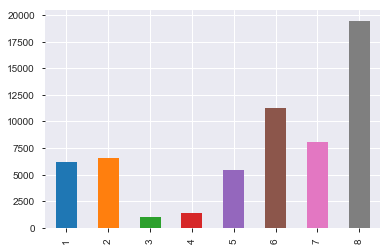

In [195]:
Insurance['Response'].value_counts().sort_index().plot.bar()

We are seeing in response variable, __class 8 has max values and class 3__ has least values.

### 6. Dividing the dataset into training,testing data and checking the shape. <a class = "anchor" id = "section6"></a>

In [224]:
# Dividing data into training and testing samples
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=4)

In [225]:
# Print the shape of training data
print(X_train.shape)
print(y_train.shape)

(44535, 118)
(44535, 1)


In [226]:
# Print the shape of testing data
print(X_test.shape)
print(y_test.shape)

(14846, 118)
(14846, 1)


### 7. Applying Classification Models with default parameters. <a class = "anchor" id = "section7"></a>

### 7.1 Logistic Regression <a class = "anchor" id = "section701"></a>

In [356]:
import timeit
start_time = timeit.default_timer()
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [357]:
logreg_score_train = logreg.score(X_train, y_train)
print("Training score: ",logreg_score_train)
logreg_score_test = logreg.score(X_test, y_test)
print("Testing score: ",logreg_score_test)
Elapsed_log = timeit.default_timer() - start_time
print(Elapsed_log)

Training score:  0.483844167508701
Testing score:  0.4808702680856796
37.97957121201034


### 7.2 Decision Tree <a class = "anchor" id = "section702"></a>

In [229]:
import timeit
start_time = timeit.default_timer()
from sklearn import tree
dt = tree.DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [230]:
dt_score_train = dt.score(X_train, y_train)
print("Training score: ",dt_score_train)
dt_score_test = dt.score(X_test, y_test)
print("Testing score: ",dt_score_test)
Elapsed_dt = timeit.default_timer() - start_time
print(Elapsed_dt)

Training score:  1.0
Testing score:  0.4002424895594773
1.6059434660019178


### 7.3 Random Forest <a class = "anchor" id = "section703"></a>

In [367]:
import timeit
start_time = timeit.default_timer()
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [368]:
rfc_score_train = rfc.score(X_train, y_train)
print("Training score: ",rfc_score_train)
rfc_score_test = rfc.score(X_test, y_test)
print("Testing score: ",rfc_score_test)
Elapsed_Rfc = timeit.default_timer() - start_time
print(Elapsed_Rfc)

Training score:  0.9902997642303806
Testing score:  0.47534689478647446
4.192852168998797


In [381]:
models = pd.DataFrame({
        'Model'          : ['Logistic Regression', 'Decision Tree', 'Random Forest'],
        'Training_Score' : [logreg_score_train, dt_score_train, rfc_score_train],
        'Testing_Score'  : [logreg_score_test, dt_score_test, rfc_score_test]
    })
models.sort_values(by='Testing_Score', ascending=False)

,Model,Training_Score,Testing_Score
2,Random Forest,0.537622,0.518928
0,Logistic Regression,0.483844,0.480870
1,Decision Tree,1.000000,0.400242


From above , we are seeing in case of __Decision Tree and Random Forest__ model is overfitting.

[Text(0,0,'Log Reg'), Text(0,0,'Decision Tree'), Text(0,0,'Random Tree')]

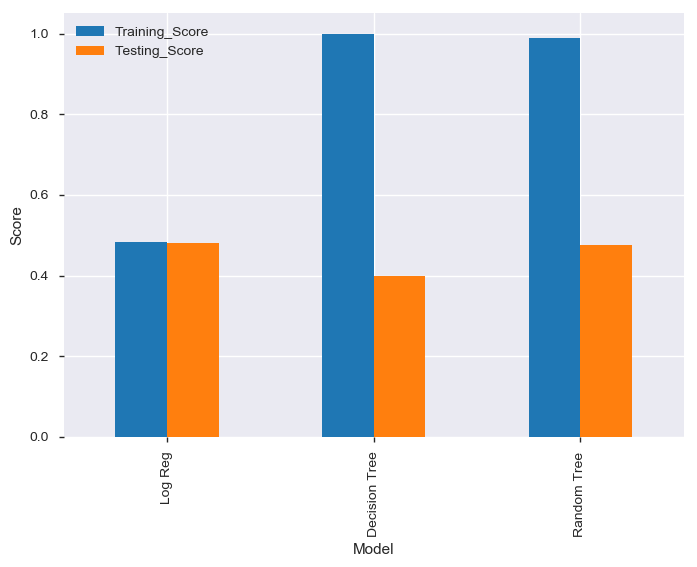

In [371]:
x = np.arange(3)
ax = models.sort_index().plot.bar()
ax.set_ylabel('Score')
ax.set_xlabel('Model')
x_lab = ['Log Reg','Decision Tree','Random Tree']
ax.set_xticklabels(x_lab)

### 8. Applying Classification Models with Grid search. <a class = "anchor" id = "section8"></a>

### 8.1 Decision Tree <a class = "anchor" id = "section802"></a>

In [285]:
from sklearn.model_selection import GridSearchCV

tree_para = [{'criterion':['gini','entropy'],'max_depth': range(2,60),
                             'max_features': ['sqrt', 'log2', None] }]
grid_search = GridSearchCV(estimator = dt, param_grid = tree_para, scoring = 'accuracy', cv =10, n_jobs =-1)
grid_search = grid_search.fit(X_train,y_train)

In [286]:
y_pred = grid_search.predict(X_test)

In [287]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred))

Accuracy score for test data is: 0.5189276572814226


In [375]:
Dt_score_train = grid_search.score(X_train, y_train)
print("Training score: ",Dt_score_train)
Dt_score_test = grid_search.score(X_test, y_test)
print("Testing score: ",Dt_score_test)

Training score:  0.5376220949814753
Testing score:  0.5189276572814226


### 8.2 Random Forest <a class = "anchor" id = "section803"></a>

In [53]:
rfc_grid = { 
    'n_estimators': [200, 2500],'max_depth': [1, 25],
    'max_features': ['auto', 'sqrt', 'log2']
}
CV_rfc = GridSearchCV(estimator = rfc, param_grid = rfc_grid, cv= 5)
CV_rfc.fit(X_train, y_train)
y_pred = CV_rfc.predict(X_test)
print (CV_rfc.best_params_)
print(accuracy_score(y_test,y_pred))

{'max_depth': 25, 'max_features': 'auto', 'n_estimators': 2500}
0.5427051057523912


In [376]:
from sklearn.ensemble import RandomForestClassifier

rfc= RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=25, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=2500, n_jobs=2,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

rfc.fit(X_train, y_train)
Rfc_score_train = rfc.score(X_train, y_train)
print("Training score: ",Rfc_score_train)
Rfc_score_test = rfc.score(X_test, y_test)
print("Testing score: ",Rfc_score_test)

Training score:  0.9447625463118895
Testing score:  0.5441869863936414


With above result, we are seeing __overfitting__.

In [377]:
from sklearn.ensemble import RandomForestClassifier

rfc= RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=10, max_features='sqrt', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=2500, n_jobs=2,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

rfc.fit(X_train, y_train)
Rfc_score_train = rfc.score(X_train, y_train)
print("Training score: ",Rfc_score_train)
Rfc_score_test = rfc.score(X_test, y_test)
print("Testing score: ",Rfc_score_test)

Training score:  0.5705624789491411
Testing score:  0.5130674929273878


In [378]:
y_pred_rfc = rfc.predict(X_test)

In [382]:
Models = pd.DataFrame({
        'Model'          : ['Decision Tree','Random Forest'],
        'Training_Score' : [Dt_score_train, Rfc_score_train],
        'Testing_Score'  : [Dt_score_test, Rfc_score_test]
    })
Models.sort_values(by='Testing_Score', ascending = False)

,Model,Training_Score,Testing_Score
0,Decision Tree,0.537622,0.518928
1,Random Forest,0.570562,0.513067


[Text(0,0,'Decision Tree'), Text(0,0,'Random Forest')]

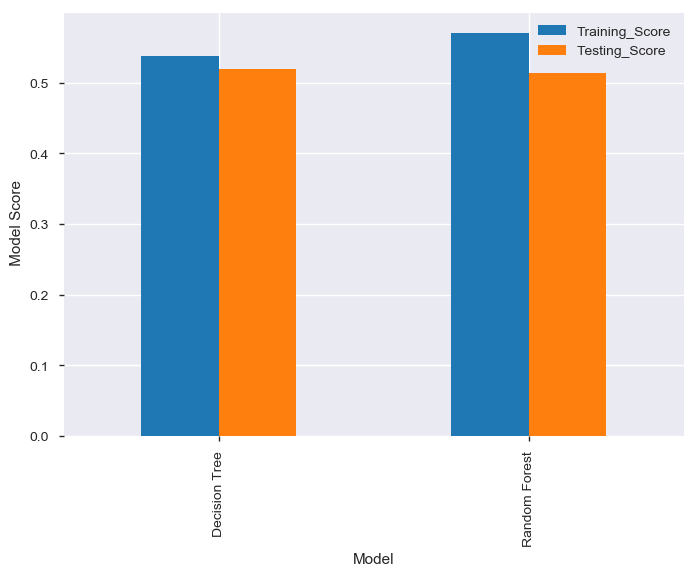

In [386]:
x = np.arange(2)
ax = Models.sort_index().plot.bar()
ax.set_ylabel(' Model Score')
ax.set_xlabel('Model')
X_lab = ['Decision Tree','Random Forest']
ax.set_xticklabels(X_lab)

## 9. Model Evaluation using Confusion MatriX, Precision and  Recall <a class = "anchor" id = "section9"></a>

## In case of decision tree

In [349]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred))

[[ 152  163    8    9  123  436  210  419]
 [ 130  338   12   12  137  392  190  412]
 [   7   11   15    8   46  138    9   29]
 [   6    1    0   36    0  155   19  128]
 [  46  120   28    3  614  362   81  138]
 [  60   69    5   21   99 1481  438  698]
 [  27    1    0    5    3  428  761  732]
 [  14    3    0   28    8  349  166 4307]]


In [344]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

             precision    recall  f1-score   support

          1       0.34      0.10      0.15      1520
          2       0.48      0.21      0.29      1623
          3       0.22      0.06      0.09       263
          4       0.30      0.10      0.15       345
          5       0.60      0.44      0.51      1392
          6       0.40      0.52      0.45      2871
          7       0.41      0.39      0.40      1957
          8       0.63      0.88      0.73      4875

avg / total       0.49      0.52      0.48     14846



# Recall= True Positive/ True Positive + False Negative
# Precision = True Positive/ True Positive + False Positive
#For Class 1(Response 1)-Lowest Risk
Recall1 = 152 /152 + (163+8+9+123+436+210+419) = 152/1520 = 0.1

Precision1 = 152/152 + (130+7+6+46+60+27+14) = 152/442 = 0.3438914027149321

#For Class 2(Response 2)- Little High Risk
Recall2 = 338/338 + (130+12+12+137+392+190+412) = 338/1623 = 0.2082563154651879

Precision2 = 338/338 + (163+11+1+120+69+1+3) = 338/706 = 0.47875354107648727

#For Class 3(Response 3)- Moderate Risk High Risk
Recall3 = 15/15 + (7+11+8+46+138+9+29) = 15/263 = 0.057034220532319393

Precision3 = 15/15 + (8+12+0+28+5+0+0) = 15/68 = 0.22058823529411764

#For Class 4(Response 4)- Moderate Risk
Recall4 = 36/36 + (6+1+0+0+155+19+128) = 36/345 = 0.10434782608695652

Precision4 = 36/36 + (9+12+8+3+21+5+28) = 36/122 = 0.29508196721311475

#For Class 5(Response 5)- Moderate Risk
Recall5 = 614/614 + (46+120+28+3+362+81+138) = 614/1392 = 0.4410919540229885

Precision5 = 614/614 + (123+137+46+0+99+3+8) = 614/1030 = 0.596116504854369

#For Class 6(Response 6)-  High Risk
Recall6 = 1481/1481 + (60+69+5+21+99+438+698) = 1481/2871 = 0.5158481365377917

Precision6 = 1481/1481 + (436+392+138+155+362+428+349) = 1481/3741 = 0.3958834536220262

#For Class 7(Response 7)-  High Risk
Recall7 = 761/761 + (27+1+0+5+3+428+732) = 761/1957 = 0.3888605007664793

Precision7 = 761/761 + (210+190+9+19+81+438+166) = 761/1874 = 0.40608324439701177

#For Class 8(Response 8)- Highest Risk
Recall8 = 4307/4307 + (14+3+0+28+8+349+166) = 4307/4875 = 0.8834871794871795

Pecision8 = 4307/4307 + (419+412+29+128+138+698+732) = 4307/6863 = 0.6275681188984409

__Average Recall__ = Recall1 +.....Recall8/8 = 0.1 + 0.2082563154651879 + 0.057034220532319393 + 0.10434782608695652 + 0.4410919540229885 + 0.5158481365377917 + 0.3888605007664793 + 0.8834871794871795/8
                                        = 0.33736576661236284
                                        

__Average Precision__ = Precision1 + ....Precision8/8 = 0.3438914027149321 + 0.47875354107648727 + 0.22058823529411764 + 0.29508196721311475 + 0.596116504854369 + 0.3958834536220262 + 0.40608324439701177 + 0.6275681188984409/8
                                                   = 0.4204958085088124 

## In case of RandomForest

In [341]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test,y_pred_rfc))

[[ 211  191    0    0  125  394  122  477]
 [ 106  350    0    0  170  447   98  452]
 [   7   13    0    0   57  128    5   53]
 [   5    0    0    0    0  107   11  222]
 [  36  113    0    0  647  382   32  182]
 [  68   97    0    0   62 1396  194 1054]
 [  17    1    0    0    5  586  444  904]
 [   3    0    0    0   11  244   56 4561]]


In [342]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred_rfc))

             precision    recall  f1-score   support

          1       0.47      0.14      0.21      1520
          2       0.46      0.22      0.29      1623
          3       0.00      0.00      0.00       263
          4       0.00      0.00      0.00       345
          5       0.60      0.46      0.52      1392
          6       0.38      0.49      0.43      2871
          7       0.46      0.23      0.30      1957
          8       0.58      0.94      0.71      4875

avg / total       0.48      0.51      0.46     14846



## 10. Conclusion <a class = "anchor" id = "section10"></a>

- This notebook helps us understanding the risk classification of customers while giving insurance using predictive Machine Learning Algorithms.
- 
- We have used below three __ML algos__ for prediction:
    - Logistic Regression
    - Decision Tree
    - Random Forest
- We used above algorithm with default parameters and have seen overfitting in case of Decision Tree and Random Forest.
- We have used again Decision tree and Random Forest using hyper parameters and have seen both are giving around same accuracy.
- As Response Variable is __imbalanced__, we may need to use some resampling techniques and use some other models to increae the accuracy/precision/recall.